In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Credit Card Fraud Classification**

This notebook demonstrates credit card fraud detection. A binary classifier is trained to perform fraud detection analysis on a credit card transaction dataset.


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import losses


### Import and explore the dataset


In [13]:
df = pd.read_csv("/content/drive/MyDrive/fraud/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Check distribution of data, we see it's a balanced dataset ( Each transaction is labeled as either fraudulent (1) or non-fraudulent (0))

In [17]:
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [14]:
# drop unneccssary column
df=df.drop(['id'],axis=1)

### Clean data

In [15]:
# separate label and features
ds_features = df.copy()
ds_class = ds_features.pop("Class")

ds_features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [18]:
# make it array
ds_features = np.array(ds_features).astype('float64')
ds_class = np.array(ds_class)

ds_features

array([[-2.60647805e-01, -4.69648450e-01,  2.49626608e+00, ...,
        -8.12301086e-02, -1.51045486e-01,  1.79821000e+04],
       [ 9.85099734e-01, -3.56045093e-01,  5.58056351e-01, ...,
        -2.48052059e-01, -6.45119230e-02,  6.53137000e+03],
       [-2.60271613e-01, -9.49384607e-01,  1.72853778e+00, ...,
        -3.00258035e-01, -2.44718229e-01,  2.51354000e+03],
       ...,
       [-3.11997393e-01, -4.09479480e-03,  1.37525588e-01, ...,
        -4.87539751e-01, -2.68741268e-01,  2.35728500e+04],
       [ 6.36870539e-01, -5.16969517e-01, -3.00888533e-01, ...,
        -1.59269263e-01, -7.62505739e-02,  1.01608300e+04],
       [-7.95144165e-01,  4.33236084e-01, -6.49140048e-01, ...,
        -1.57511260e+00,  7.22936496e-01,  2.14939200e+04]])

### Prepare for training

We use 80% data for training and validation, 20% for testing;

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(ds_features, ds_class ,test_size=0.2,random_state=55)

# Create a validation dataset from training data
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train ,test_size=0.2,random_state=55)

X_train.shape

(363923, 29)

In [30]:
X_valid.shape

(90981, 29)

### Build model and train

In [43]:
# create a normalization layer
normalize = layers.Normalization()
# apply
normalize.adapt(ds_features)

In [44]:
initializer = tf.keras.initializers.HeNormal(22)

model = keras.Sequential([
      layers.Dense(22, kernel_initializer=initializer),
      layers.Dense(55, activation='relu'),
      layers.Dense(55, activation='relu'),
      layers.Dense(25, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

In [51]:
model.build()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 22)                660       
                                                                 
 dense_14 (Dense)            (None, 55)                1265      
                                                                 
 dense_15 (Dense)            (None, 55)                3080      
                                                                 
 dense_16 (Dense)            (None, 25)                1400      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 6431 (25.12 KB)
Trainable params: 6431 (25.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# stop when no improve in loss after 3 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# training
epochs = 30
bs = 50

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size = bs,
                    validation_data=(X_valid, y_valid),
                    callbacks = [callback])

Epoch 1/30
7279/7279 [==============================] - 36s 5ms/step - loss: 1.4911 - binary_accuracy: 0.8225 - val_loss: 0.8855 - val_binary_accuracy: 0.8095
Epoch 2/30
7279/7279 [==============================] - 37s 5ms/step - loss: 0.2054 - binary_accuracy: 0.9295 - val_loss: 0.1794 - val_binary_accuracy: 0.9360
Epoch 3/30
7279/7279 [==============================] - 34s 5ms/step - loss: 0.1546 - binary_accuracy: 0.9448 - val_loss: 0.1363 - val_binary_accuracy: 0.9469
Epoch 4/30
7279/7279 [==============================] - 35s 5ms/step - loss: 0.1379 - binary_accuracy: 0.9502 - val_loss: 0.1083 - val_binary_accuracy: 0.9573
Epoch 5/30
7279/7279 [==============================] - 34s 5ms/step - loss: 0.1316 - binary_accuracy: 0.9528 - val_loss: 0.1179 - val_binary_accuracy: 0.9593
Epoch 6/30
7279/7279 [==============================] - 33s 5ms/step - loss: 0.1214 - binary_accuracy: 0.9549 - val_loss: 0.1082 - val_binary_accuracy: 0.9597
Epoch 7/30
7279/7279 [========================

### Results

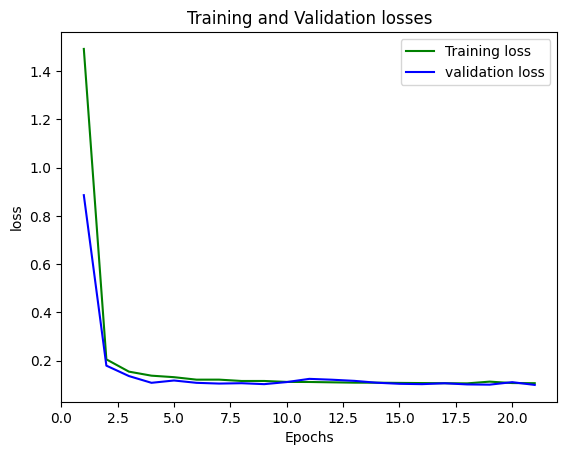

In [47]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(val_acc) + 1)


plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

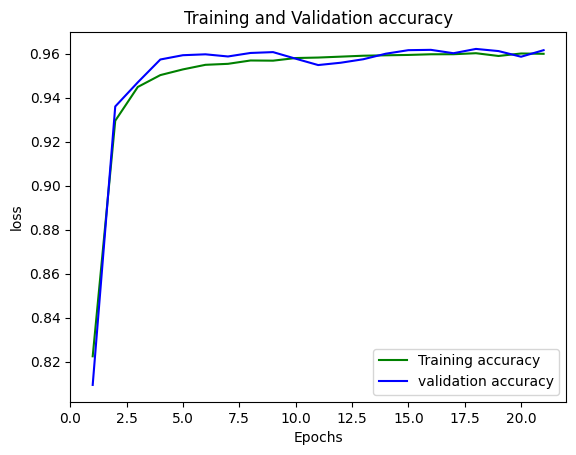

In [48]:
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
# test accuracy
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

3554/3554 [==============================] - 9s 3ms/step - loss: 0.0984 - binary_accuracy: 0.9615
Loss:  0.09843165427446365
Accuracy:  0.9615039825439453
